In [51]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

(60000, 28, 28)


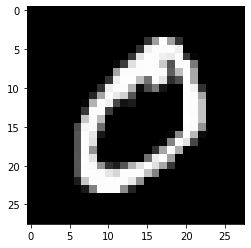

In [52]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))
print(x_train.shape)

In [53]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(128,activation='relu'),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(10,activation='softmax')
                            ])

In [54]:
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1],predictions).numpy()
model.compile(optimizer='adam',
                loss = loss_fn,
                metrics = ['accuracy'])

In [55]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3088 - accuracy: 0.9081
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1474 - accuracy: 0.9548
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1153 - accuracy: 0.9647
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0945 - accuracy: 0.9710
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0857 - accuracy: 0.9734
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0748 - accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0728 - accuracy: 0.9764
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0633 - accuracy: 0.9795
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9798
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.056

In [56]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.0728 - accuracy: 0.9800 - 817ms/epoch - 3ms/step


[0.07282082736492157, 0.9800000190734863]

In [64]:
predictions = model(x_train[1:2])
np.argmax(predictions)
image = Image.open("first.png").convert("L")
image = image.resize((28,28))
img = np.array(image)/255.0


array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.